In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
M_Array = np.loadtxt("DataSet1.txt",dtype=int) #Main Array

In [4]:
ExposureTimes = np.array([1/100,1/149,1/200,1/250,1/303,1/345]) #Must be entered in the order data was added to text file
N = len(ExposureTimes) #Number of Exposure Times

In [5]:
len(M_Array)/256

36.0

Take Main Array from notepad and split into each "Data Point". Where each data point contains 0-255 information.

In [6]:
C_Array = np.array([M_Array[x:x+256] for x in np.arange(0,len(M_Array),256)]) #Composite Array. Split Main Array every 256 entries

In [7]:
len(C_Array) #Total Number of Histograms

36

Calculating average intensity per pixel from each histogram

In [8]:
Avg_C_Array = np.array([np.sum(np.array([a*b for a,b in C_Array[j]]))/np.sum(np.array([C_Array[j][i][1] for 
                    i in np.arange(len(C_Array[j]))])) for j in np.arange(len(C_Array))])

Now group data points by color. Every third, in RGB order.

In [9]:
Red_Array = np.array([Avg_C_Array[x] for x in np.arange(0,len(Avg_C_Array),3)])
Green_Array = np.array([Avg_C_Array[x] for x in np.arange(1,len(Avg_C_Array),3)])
Blue_Array = np.array([Avg_C_Array[x] for x in np.arange(2,len(Avg_C_Array),3)])

In [10]:
len(Red_Array) #Number of Histograms Per Color Channel

12

Now split Red_Array every N entries. This gives data for each thickness

In [11]:
Red_C_Array = np.array([Red_Array[x:x+N] for x in np.arange(0,len(Red_Array),N)])
Green_C_Array = np.array([Green_Array[x:x+N] for x in np.arange(0,len(Green_Array),N)])
Blue_C_Array = np.array([Blue_Array[x:x+N] for x in np.arange(0,len(Blue_Array),N)])

In [12]:
len(Red_C_Array) #Number of Thicknesses we took data for

2

In [13]:
len(Red_C_Array[0]) #This should be N

6

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


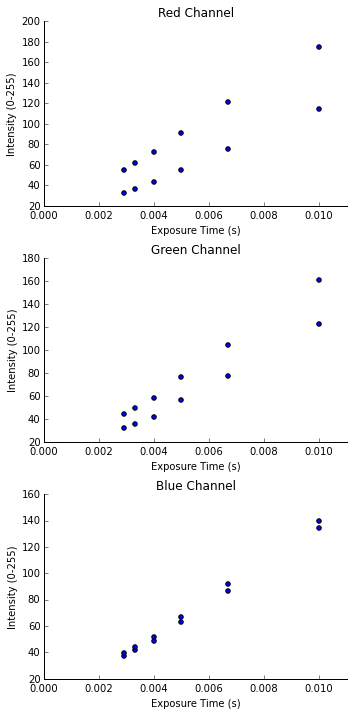

In [18]:
f, (ax1,ax2,ax3) = plt.subplots(3, 1,figsize=(5,10))

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('left')
ax3.xaxis.set_ticks_position('bottom')

plt.sca(ax1)
for i in np.arange(0,len(Red_C_Array)):
    plt.scatter(ExposureTimes,Red_C_Array[i])
    plt.title("Red Channel")
    plt.xlabel("Exposure Time (s)")
    plt.ylabel("Intensity (0-255)")
    plt.xlim(0,np.amax(ExposureTimes)*1.1)
    
plt.sca(ax2)
for i in np.arange(0,len(Green_C_Array)):
    plt.scatter(ExposureTimes,Green_C_Array[i])
    plt.title("Green Channel")
    plt.xlabel("Exposure Time (s)")
    plt.ylabel("Intensity (0-255)")
    plt.xlim(0,np.amax(ExposureTimes)*1.1)

plt.sca(ax3)
for i in np.arange(0,len(Blue_C_Array)):
    plt.scatter(ExposureTimes,Blue_C_Array[i])
    plt.title("Blue Channel")
    plt.xlabel("Exposure Time (s)")
    plt.ylabel("Intensity (0-255)")
    plt.xlim(0,np.amax(ExposureTimes)*1.1)

    

plt.tight_layout()

Compute std and add error bars